In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [2]:
(x_train , y_train),(x_test , y_test) = datasets.cifar10.load_data()

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","car","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

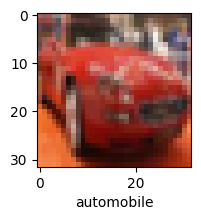

In [8]:
plot_sample(x_train,y_train,5)

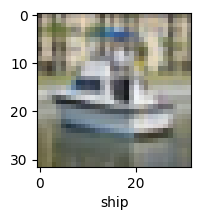

In [9]:
plot_sample(x_train,y_train,501)

In [10]:
# normalizing image
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
# building simple artificial nueral network (ann)
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(5000,activation = 'relu'),#adjust by yourself  
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'softmax'),
])
ann.compile( optimizer = 'SGD', 
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(x_train,y_train,epochs = 5)#train according your needs kitni bar train kerna ha epochs matlab

D:\python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 101ms/step - accuracy: 0.3057 - loss: 1.9258
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.4215 - loss: 1.6369
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.4543 - loss: 1.5449
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 99ms/step - accuracy: 0.4792 - loss: 1.4842
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.4995 - loss: 1.4292


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.49      0.55      1000
           1       0.76      0.37      0.49      1000
           2       0.40      0.22      0.29      1000
           3       0.41      0.25      0.31      1000
           4       0.30      0.62      0.40      1000
           5       0.51      0.21      0.29      1000
           6       0.54      0.44      0.48      1000
           7       0.38      0.73      0.50      1000
           8       0.56      0.70      0.62      1000
           9       0.52      0.61      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [14]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

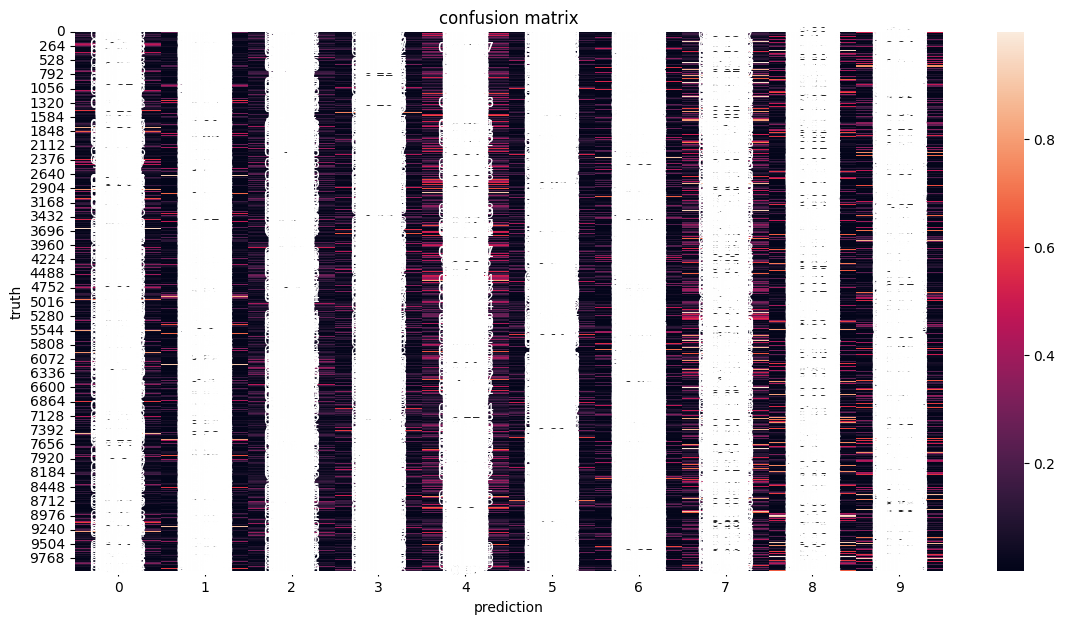

In [15]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel("truth")
plt.xlabel("prediction")
plt.title("confusion matrix")
plt.show

In [16]:
# making cnn model to train images
cnn = models.Sequential([
    layers.Conv2D(filters = 32,kernel_size = (3,3) , activation = 'relu' , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64,kernel_size = (3,3) , activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])


D:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy' , 
            metrics = ['accuracy'])

In [18]:
cnn.fit(x_train,y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.3783 - loss: 1.7102
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6004 - loss: 1.1351
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6538 - loss: 0.9941
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.6861 - loss: 0.8995
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7164 - loss: 0.8196
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.7353 - loss: 0.7719
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7504 - loss: 0.7191
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.7648 - loss: 0.6826
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.7787 - loss: 0.6349
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7894 - loss: 0.6061


In [19]:
cnn.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6911 - loss: 0.9752


[0.9897359609603882, 0.6862000226974487]

In [20]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[1.2262714e-02, 1.5984818e-04, 8.0223251e-03, 8.1685615e-01,
        6.1016344e-04, 1.0173140e-01, 1.3685180e-02, 7.3081865e-05,
        4.6206012e-02, 3.9312206e-04],
       [2.3141003e-03, 3.3471800e-02, 1.0388795e-06, 4.5004044e-06,
        2.4383858e-06, 2.7969161e-08, 3.4062349e-08, 6.2538497e-08,
        9.6374619e-01, 4.5985167e-04],
       [1.0161253e-01, 2.2752574e-01, 5.1485584e-03, 6.5956034e-02,
        6.5062745e-03, 4.0020836e-03, 6.3165342e-03, 3.6358751e-02,
        4.6841362e-01, 7.8159921e-02],
       [7.3706007e-01, 1.7862762e-03, 2.1653485e-02, 1.6055058e-03,
        6.3021928e-03, 1.0372747e-05, 2.2623337e-04, 1.6357037e-04,
        2.3118736e-01, 5.0304916e-06],
       [3.5236204e-07, 9.5575588e-06, 5.6148255e-03, 3.6103930e-02,
        4.6437863e-02, 3.3316080e-04, 9.1149354e-01, 1.3592887e-06,
        5.2201863e-06, 1.4929941e-07]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in  y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

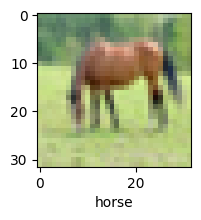

In [23]:
# predicts from test data
plot_sample(x_test , y_test, 60)

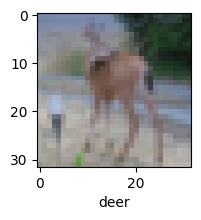

In [24]:
plot_sample(x_test , y_test, 100)

In [25]:
classes[y_classes[4]]

'frog'

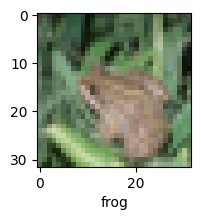

In [26]:
plot_sample(x_test , y_test, 4)

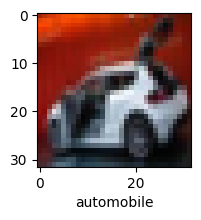

In [27]:
plot_sample(x_test , y_test, 6)

In [28]:
classes[y_classes[6]]

'automobile'

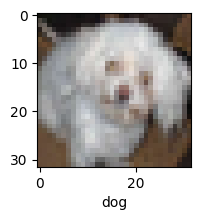

In [29]:
plot_sample(x_test , y_test, 1000)

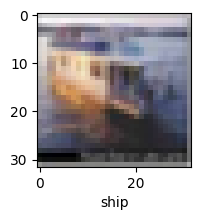

In [30]:
plot_sample(x_test , y_test, 6000)

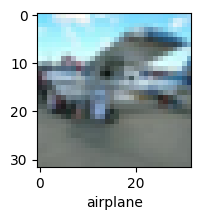

In [32]:
plot_sample(x_test , y_test, 6001)

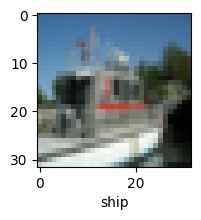

In [33]:
plot_sample(x_test , y_test, 600)

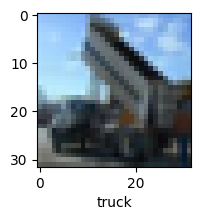

In [34]:
plot_sample(x_test , y_test, 50)

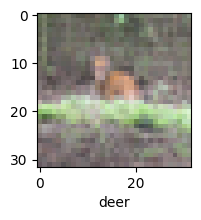

In [35]:
plot_sample(x_test , y_test, 32)

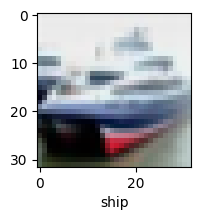

In [36]:
plot_sample(x_test , y_test, 1)